# **Part 1**


In [91]:
import random
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import timeit
import scipy.spatial as sp
import scipy.linalg
from scipy.spatial import Delaunay
from scipy.spatial import Voronoi, voronoi_plot_2d
import networkx as nx

In [92]:


def generate_unique_pairs(num_pairs, x_range, y_range):
    unique_pairs = set()                                                        # We use set to get rid of duplicates

    while len(unique_pairs) < num_pairs:
        x = random.randint(x_range[0], x_range[1])
        y = random.randint(y_range[0], y_range[1])
        unique_pairs.add((x, y))                                                # Set automatically handles duplicates

    return list(unique_pairs)

                                                                                # Generate 120 unique pairs of integers where x and y are between 1 and 100
points = generate_unique_pairs(120, (1, 100), (1, 100))

print(points)
# This is the dataset that was ued in order to produce the following result of the followong algorithms
points = [(81, 21), (62, 26), (29, 32), (27, 77), (51, 71), (46, 2), (21, 73), (95, 22), (39, 81), (27, 61), (88, 56), (17, 14), (76, 8), (32, 60), (57, 68), (35, 10), (35, 74), (95, 70), (80, 51), (39, 10), (44, 95), (7, 21), (6, 34), (60, 23), (61, 31), (16, 72), (55, 63), (39, 76), (82, 26), (76, 40), (77, 5), (83, 55), (19, 70), (22, 87), (51, 68), (4, 18), (15, 11), (16, 10), (64, 59), (73, 7), (81, 84), (48, 99), (54, 30), (92, 69), (92, 32), (88, 74), (64, 79), (16, 94), (21, 11), (56, 75), (22, 73), (72, 31), (23, 81), (26, 43), (61, 19), (7, 57), (48, 3), (51, 65), (72, 42), (90, 2), (10, 12), (39, 2), (48, 69), (76, 94), (95, 74), (4, 8), (29, 92), (59, 8), (72, 44), (4, 26), (55, 92), (78, 39), (2, 1), (73, 52), (51, 42), (17, 56), (80, 57), (69, 2), (61, 53), (77, 15), (94, 65), (84, 94), (30, 74), (62, 54), (2, 76), (58, 68), (15, 97), (23, 89), (61, 73), (44, 57), (51, 19), (97, 50), (9, 29), (29, 62), (94, 42), (9, 38), (11, 35), (67, 64), (18, 22), (26, 90), (63, 39), (28, 17), (13, 13), (60, 97), (89, 48), (12, 2), (95, 82), (16, 27), (59, 62), (32, 44), (72, 25), (42, 55), (10, 50), (22, 15), (42, 73), (47, 87), (47, 32), (47, 96), (97, 45), (24, 24)]

sorted_points = sorted(points, key=lambda points: (points[0], points[1]))       #Sort the points in a lexicogralexicographical order in oder to use them in the following algorithms

[(57, 91), (27, 50), (67, 68), (89, 77), (18, 44), (68, 48), (45, 37), (2, 66), (94, 30), (32, 76), (3, 49), (26, 23), (24, 90), (92, 17), (9, 10), (32, 60), (37, 35), (69, 97), (14, 51), (53, 27), (82, 42), (62, 39), (27, 72), (76, 56), (100, 78), (85, 68), (58, 17), (72, 43), (100, 96), (58, 99), (4, 52), (90, 21), (25, 84), (30, 98), (87, 13), (79, 94), (20, 17), (54, 83), (60, 7), (49, 59), (27, 22), (42, 20), (93, 31), (30, 91), (1, 85), (33, 99), (21, 82), (68, 1), (52, 78), (40, 58), (12, 42), (88, 19), (4, 47), (81, 77), (55, 3), (44, 37), (56, 66), (6, 86), (15, 34), (52, 71), (4, 40), (71, 60), (8, 86), (19, 31), (42, 33), (48, 67), (18, 75), (78, 10), (55, 17), (23, 83), (8, 70), (52, 82), (64, 65), (93, 55), (22, 68), (67, 3), (18, 25), (13, 41), (60, 79), (100, 36), (76, 78), (94, 29), (38, 6), (5, 100), (3, 2), (33, 64), (76, 71), (30, 83), (37, 43), (95, 69), (13, 27), (96, 61), (33, 57), (71, 41), (37, 18), (33, 75), (16, 4), (2, 14), (9, 84), (20, 4), (50, 2), (99, 77)

In [86]:
def orientation(p, q, r):
    """
    Computes the orientation of three points using the determinant method.

    :param p: The first point (x1, y1)
    :param q: The second point (x2, y2)
    :param r: The third point (x3, y3)
    :return: A positive number if the orientation is counterclockwise, CCK
             a negative number if the orientation is clockwise,
             and 0 if the points are collinear.
    """
    # Coordinates of the points
    x1, y1 = p
    x2, y2 = q
    x3, y3 = r

    # Calculate the determinant
    determinant = x1 * (y2 - y3) - y1 * (x2 - x3) + (x2 * y3 - x3 * y2)
    if determinant > 0:                                                   # r is on the left side of the line
        return 1
    elif determinant < 0:                                                 # r is on the right side of the line
        return -1
    else:
        return 0                                                          # the three points are colinear


## **Incremaental Algorithm**

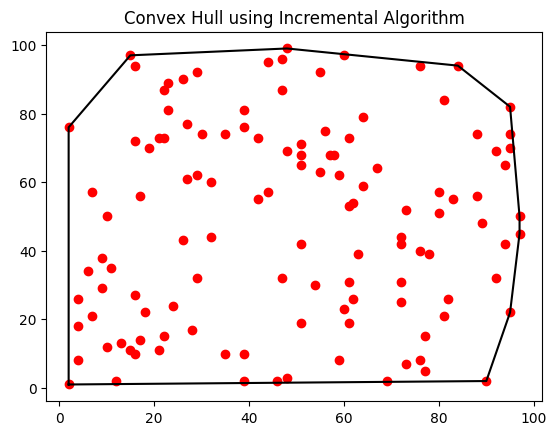

In [87]:
def Incremental_Algorithm( points ):

        upper_hull = []                                                                                     # Construct the lower hull
                                                                                                            # Initialize with the first two points
        upper_hull.append(points[0])
        upper_hull.append(points[1])

        for p in points[2:]:                                                                                # Add the remaining points
            upper_hull.append(p)
            while len(upper_hull) > 2 and orientation(upper_hull[-3], upper_hull[-2], upper_hull[-1]) <= 0: # Remove points that create counterclockwise turns
                upper_hull.pop(-2)                                                                          # Remove the middle of the last three points


        lower_hull = []                                                                                     # Construct the lower hull
                                                                                                            # Initialize with the last two points
        lower_hull.append(points[-1])
        lower_hull.append(points[-2])

        for p in reversed(points[:-2]):                                                                     # Add the remaining points in reverse order
            lower_hull.append(p)
            while len(lower_hull) > 2 and orientation(lower_hull[-3], lower_hull[-2], lower_hull[-1]) <= 0: # Remove points that create counterclockwise turns
                lower_hull.pop(-2)                                                                          # Remove the middle of the last three points

                                                                                                            # Remove the first and last point from the lower hull
        lower_hull = lower_hull[1:-1]
        convex_hull_points = upper_hull + lower_hull                                                        # Append the lower hull to the upper hull


        return convex_hull_points                                                                           # Return the convex hull


vertices = Incremental_Algorithm(sorted_points)

# Print the vertices of the convex hull
#print("Vertices of the convex hull in clockwise order:")
# for p in hull:
#   print(p)

plt.scatter(list(zip(*sorted_points))[0], list(zip(*sorted_points))[1], color = 'red')
plt.plot([vertex[0] for vertex in vertices] + [vertices[0][0]], [vertex[1] for vertex in vertices] + [vertices[0][1]], color = 'black')
plt.title("Convex Hull using Incremental Algorithm");



## **Gift Wrapping Algorithm**

In [36]:

def Gift_Wrapping(points):

    points.sort()                 # Sort the points in lexicographical order
    start_point = points[0]       # The first vertex start_point is selected as the leftmost point.
    hull_points = [points[0]]     # Update the hull_points list to include start_point
    remaining_points = points[:]  # Includes all points that are not yet in the hull

    while True:
        # current_point starts by being a random point that is not yet in the hull.
        # It receives its true value of the point with the maximum angle from start_point after the second loop.
        random_index = random.randrange(len(remaining_points))
        current_point = remaining_points[random_index]

        for candidate_point in remaining_points:

            if candidate_point != current_point:

                if orientation(start_point, current_point, candidate_point) == -1:              # if start_point, current_point and candidate_point define a CW orientation.
                    current_point = candidate_point

                elif orientation(start_point, current_point, candidate_point) == 0:             # if start_point, current_point and candidate_point are collinear and current_point is an internal point of start_point candidate_point.

                    dist_start_current = sp.distance.euclidean(start_point, current_point)
                    dist_current_candidate = sp.distance.euclidean(current_point, candidate_point)
                    dist_start_candidate = sp.distance.euclidean(start_point, candidate_point)

                    if dist_start_current + dist_current_candidate == dist_start_candidate:     # Internal point current_point of start_point candidate_point check.
                        current_point = candidate_point

        if current_point == points[0]: # Looping until the selected point current_point is equal to the initial leftmost point.
            break
        else:                          # If the stopping condition is false, we update start_point and the hull_points and remaining_points lists
            start_point = current_point
            hull_points.append(start_point)
            remaining_points.remove(start_point)

    return hull_points


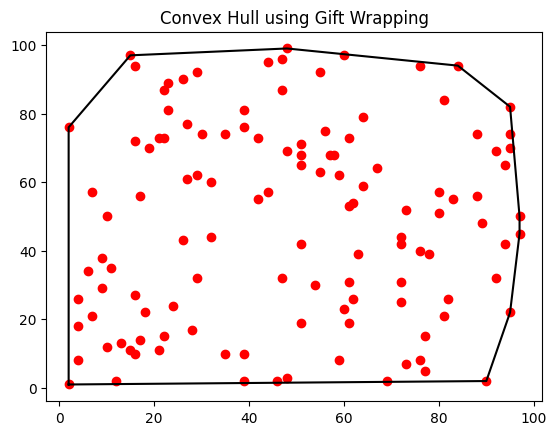

In [88]:
vertices = Gift_Wrapping(points)

plt.scatter(list(zip(*points))[0], list(zip(*points))[1], color = 'red')
plt.plot([vertex[0] for vertex in vertices] + [vertices[0][0]], [vertex[1] for vertex in vertices] + [vertices[0][1]], color = 'black')
plt.title("Convex Hull using Gift Wrapping");

## **Divide and Conquer Algorithm**

In [39]:
def find_upper_bridge(left_hull, right_hull):
    left_index = left_hull.index(max(left_hull))     # Rightmost point in the left hull
    right_index = right_hull.index(min(right_hull))  # Leftmost point in the right hull

    count = 0
    while count < 2:
        count = 0

        # Check orientation of the next left hull point relative to the current bridge
        next_left_index = (left_index + 1) % len(left_hull)
        orientation_result = orientation(right_hull[right_index], left_hull[left_index], left_hull[next_left_index])
        if orientation_result == -1:
            left_index = next_left_index
        else:
            count += 1

        # Check orientation of the next right hull point relative to the current bridge
        next_right_index = (right_index - 1) % len(right_hull)
        orientation_result = orientation(left_hull[left_index], right_hull[right_index], right_hull[next_right_index])
        if orientation_result == 1:
            right_index = next_right_index
        else:
            count += 1

    return left_index, right_index



In [40]:
def find_lower_bridge(left_hull, right_hull):
    left_index = left_hull.index(max(left_hull))     # Rightmost point in the left hull
    right_index = right_hull.index(min(right_hull))  # Leftmost point in the right hull

    count = 0
    while count < 2:
        count = 0

        # Check orientation of the next right hull point relative to the current bridge
        next_right_index = (right_index + 1) % len(right_hull)
        orientation_result = orientation(left_hull[left_index], right_hull[right_index], right_hull[next_right_index])
        if orientation_result == -1:
            right_index = next_right_index
        else:
            count += 1

        # Check orientation of the next left hull point relative to the current bridge
        next_left_index = (left_index - 1) % len(left_hull)
        orientation_result = orientation(right_hull[right_index], left_hull[left_index], left_hull[next_left_index])
        if orientation_result == 1:
            left_index = next_left_index
        else:
            count += 1

    return left_index, right_index


In [32]:
def merge(left_hull, right_hull):
    merged_vertices = []

    upper_left_index, upper_right_index = find_upper_bridge(left_hull, right_hull)
    lower_left_index, lower_right_index = find_lower_bridge(left_hull, right_hull)

    # Collect points from the left hull from the upper to the lower bridge
    i = upper_left_index
    while i != lower_left_index:
        merged_vertices.append(left_hull[i])
        i = (i + 1) % len(left_hull)
    merged_vertices.append(left_hull[lower_left_index])

    # Collect points from the right hull from the lower to the upper bridge
    i = lower_right_index
    while i != upper_right_index:
        merged_vertices.append(right_hull[i])
        i = (i + 1) % len(right_hull)
    merged_vertices.append(right_hull[upper_right_index])

    return merged_vertices


In [33]:
def divide_and_conquer(points):
    points.sort()
    if len(points) <= 3:
        # Base case: directly return sorted points
        sorted_points = points[:]
        if len(sorted_points) == 3:
            if orientation(sorted_points[0], sorted_points[1], sorted_points[2]) == 1:
                sorted_points.reverse()
        return sorted_points


    mid = math.ceil(len(points) / 2)    # Divide the list points recurvly
    left_half = points[:mid]
    right_half = points[mid:]

    left_hull = divide_and_conquer(left_half)
    right_hull = divide_and_conquer(right_half)

    return merge(left_hull, right_hull)


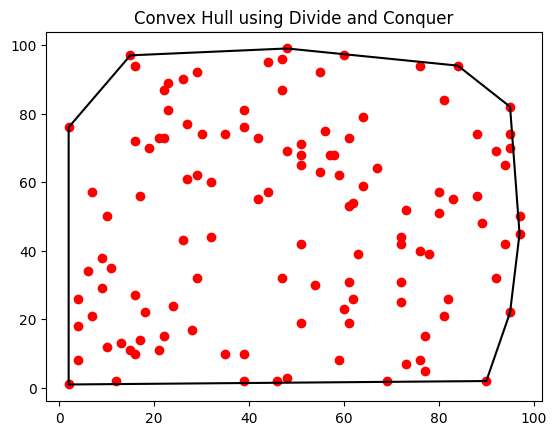

In [89]:
vertices = divide_and_conquer(points)

plt.scatter(list(zip(*points))[0], list(zip(*points))[1], color = 'red')
plt.plot([vertex[0] for vertex in vertices] + [vertices[0][0]], [vertex[1] for vertex in vertices] + [vertices[0][1]], color = 'black')
plt.title("Convex Hull using Divide and Conquer");

## **QuickHull Algorithm**

In [53]:
def line_distance(point_1, point_2, point_p):
    # We first handle the case of a vertical line.
    if point_2[0] - point_1[0] == 0:
        distance = abs(point_p[0] - point_1[0])
        return distance

    # Coefficients of the line equation Ax + By + C = 0
    A = (point_2[1] - point_1[1]) / (point_2[0] - point_1[0])
    B = -1
    C = point_1[1] - A * point_1[0]

    # Calculate distance between the line defined above and point p.
    distance = abs(A * point_p[0] + B * point_p[1] + C) / np.sqrt(A**2 + B**2)

    return distance

# Main Quick Hull implementation
def quickhull(points_S, line_start_A, line_end_B):


    if len(points_S) <= 2:

       return [line_start_A, line_end_B]

    # Finding the farthest point form the hull
    max_distance = -1
    farthest_point = None
    for point in points_S:
        distance = line_distance(line_start_A, line_end_B,point)
        if distance > max_distance:
            max_distance = distance
            farthest_point = point



    if farthest_point is None:
        return [line_start_A, line_end_B]

    First_set = []
    for p in points_S:

      if orientation(line_start_A, farthest_point, p) <= 0:
        First_set.append(p)

    Second_set = []
    for p in points_S:
      if orientation(farthest_point, line_end_B, p) <= 0:
        Second_set.append(p)


    return quickhull(First_set, line_start_A, farthest_point) + quickhull(Second_set, farthest_point, line_end_B)






def Quick_hull(points):
    # Checking again for duplicates
    points_set = set(tuple(p) for p in points)
    points = list(points_set)

    #Finding the outermost points of them all
    min_x = min(points, key=lambda p: p[0])
    max_x = max(points, key=lambda p: p[0])
    min_y = min(points, key=lambda p: p[1])
    max_y = max(points, key=lambda p: p[1])

    Upperlist = []
    Bottomlist = []
    Rightlist =[]
    Leftlist = []
    Upper_hull = []
    Bottom_hull = []
    Right_hull =[]
    Left_hull = []
    #Initializing each convex hull list of each area
    for point in points:

      if orientation(min_y, max_x, point) <= 0:
          Rightlist.append(point)

      if  orientation(max_y, max_x, point) <= 0:
          Upperlist.append(point)

      if orientation(min_y, min_x, point) <= 0:
          Bottomlist.append(point)

      if orientation(min_x, max_y, point) <= 0:
          Leftlist.append(point)

    # Calculating the convex hull in each of the four areas
    Right_hull = quickhull(Rightlist, max_x, min_y)
    Upper_hull = quickhull(Upperlist, max_y, max_x)
    Bottom_hull = quickhull(Bottomlist, min_y, min_x)
    Left_hull = quickhull(Leftlist, min_x, max_y)



    return Right_hull + Upper_hull + Bottom_hull + Left_hull








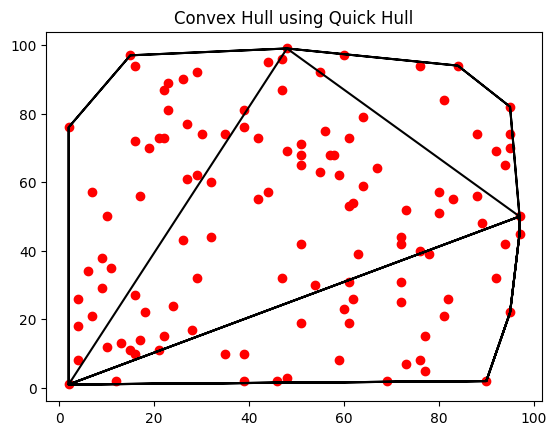

In [90]:
vertices = Quick_hull(points)

plt.scatter(list(zip(*points))[0], list(zip(*points))[1], color = 'red')
plt.plot([vertex[0] for vertex in vertices] + [vertices[0][0]], [vertex[1] for vertex in vertices] + [vertices[0][1]], color = 'black')
plt.title("Convex Hull using Quick Hull");




If we printed each stage of the construction of the convex hull we see that 4 points are been conected and they shape a triangle with an extra line. These points are the the outermost points where the Algorithm begins.

# **Part 2**

## The following part of the code is the implementation of the incremantal linear algorithm

The linear problem we want to solve :
$$- max{5x1 + 12x2}$$

The restrictions:
- $$x1 + 3x2 ≤ 5$$
- $$−x1 + x2 ≥ −3$$
- $$7x1 − 3x2 ≥ 1$$
- $$4x1 − 9x2 ≤ 35$$
- $$3x1 − 7x2 ≤ 32$$
- $$−2x1 + 5x2 ≤ 26$$
- $$x1, x2 ≥ 0$$

In [95]:
#Objective function to maximize
def objective_function(variables_x):
    result = 5 * variables_x[0] + 12 * variables_x[1]
    return result

# Function to check if a point satisfies a constraint
# flag == 1 means constraint is >=, flag == 0 means constraint is <=
def check_constraint(flag, x1, x2, a1, a2, b):
    result = a1 * x1 + a2 * x2
    if (result >= b and flag == 1) or (result <= b and flag == 0):
        return flag
    else:
        return -1

# Main function to perform Incremental Linear Programming
def incremental_linear_programming(A, b, constraint_types):
    vertices = []

    # Initialize with three vertices formed by the first three constraints
    vertex1 = scipy.linalg.solve(A[:2], b[:2])
    vertices.append(vertex1)
    vertex2 = scipy.linalg.solve(A[1:3], b[1:3])
    vertices.append(vertex2)
    vertex3 = scipy.linalg.solve(np.vstack([A[0], A[3]]), np.vstack([b[0], b[3]]))
    vertices.append(vertex3)

    # Find the vertex that maximizes the objective function
    max_value = objective_function(vertices[0])
    solution = vertices[0]
    for vertex in vertices[1:]:
        value = objective_function(vertex)
        if value > max_value:
            max_value = value
            solution = vertex

    # Start evaluating additional constraints
    for i in range(3, len(A)):

        # Check if the current solution satisfies the next constraint
        if check_constraint(constraint_types[i], solution[0], solution[1], A[i][0], A[i][1], b[i]) != constraint_types[i]:
            # Handle the case where A[i][0] == 0 or A[i][1] == 0
            if A[i][0] != 0:
                # Solving for x1 as a function of x2
                x1_function = lambda x2: (b[i] - A[i][1] * x2) / A[i][0]
            elif A[i][1] != 0:
                # Special case: A[i][0] == 0, solve directly for x2
                x2_solution = b[i] / A[i][1]

                # Check if [solution[0], x2_solution] satisfies all previous constraints
                is_feasible = True
                for j in range(i):
                    if check_constraint(constraint_types[j], solution[0], x2_solution, A[j][0], A[j][1], b[j]) != constraint_types[j]:
                        is_feasible = False
                        break

                if not is_feasible:
                    print(f"Solution [{solution[0]}, {x2_solution}] does not satisfy previous constraints.")
                    return None  # Or handle the infeasibility in some other way

                # If feasible, update solution and continue
                solution = [solution[0], x2_solution]
                continue  # No need to solve further, move to the next constraint

            else:
                raise ValueError(f"Invalid constraint at row {i}: both A[i][0] and A[i][1] are zero")

            # Transform the previous constraints into a smaller problem in terms of x2
            small_constraints = []
            small_constants = []
            for j in range(i):
                if A[i][0] != 0:  # Regular case, no division by zero
                    small_constraint = - (A[i][1] / A[i][0]) * A[j][0] + A[j][1]
                    small_constant = - (b[i] / A[i][0]) * A[j][0] + b[j]
                else:  # Handle case where A[i][0] == 0, x2 only
                    if A[i][1] != 0:
                        small_constraint = A[j][1]  # The constraint is independent of x1
                        small_constant = b[j]
                    else:  # Degenerate case, raise error
                        raise ValueError(f"Invalid constraint at row {i}: both A[i][0] and A[i][1] are zero")

                small_constraints.append(small_constraint)
                small_constants.append(small_constant)

            # Create a small objective function in terms of x2
            small_objective_function = lambda x2: objective_function([x1_function(x2), x2]) if A[i][0] != 0 else objective_function([solution[0], x2_solution])

            # Solve the smaller problem to find the best x2
            new_x2 = small_linear_programming_algorithm(small_objective_function, small_constraints, small_constants, constraint_types)

            # If no valid solution is found, the problem is infeasible
            if new_x2 is None:
                print("The problem is infeasible with the given constraints.")
                return None

            # Update the solution with the new x1 and x2 values
            if A[i][0] != 0:
                new_x1 = x1_function(new_x2)
                solution = [new_x1, new_x2]
            else:
                solution = [solution[0], x2_solution]  # Only update x2 if A[i][0] == 0

            max_value = objective_function(solution)
            print("Updated solution:", solution)
            print("Updated max value:", max_value)

    return solution

def small_linear_programming_algorithm(small_objective_function, coefficients, constants, constraint_types):
    leq_res = []
    geq_res = []

    for coefficient, constant, flag in zip(coefficients, constants, constraint_types):
        # Assuming x1 = 0 in 1D case, we check the constraint for x2 (i.e., candidate_solution)
        if check_constraint(flag, 0, constant / coefficient, 0, coefficient, constant) == flag:
            geq_res.append(constant / coefficient)
        else:
            if check_constraint(flag, 0, constant / coefficient, 0, coefficient, constant) == flag:
                leq_res.append(constant / coefficient)

    result = None

    # Find candidate solution
    if len(geq_res) == 0:
        candidate_solution = min(leq_res)
    elif len(leq_res) == 0:
        candidate_solution = max(geq_res)
    else:
        lower_bound = min(leq_res)
        upper_bound = max(geq_res)

        # Compare objective values at the bounds
        if small_objective_function(lower_bound) > small_objective_function(upper_bound):
            candidate_solution = lower_bound
        else:
            candidate_solution = upper_bound

    # Check if the candidate solution satisfies all constraints
    is_feasible = True
    for coefficient, constant, flag in zip(coefficients, constants, constraint_types):
        if not check_constraint(flag, 0, candidate_solution, 0, coefficient, constant) == flag:
            is_feasible = False
            break

    if is_feasible:
        result = candidate_solution
    else:
        print("Candidate solution does not satisfy the constraints.")

    return result




In [96]:
An = np.array([[1, 3], [-1, 1], [7, -3], [4,-9], [3, -7], [-2, 5],[1,0], [0, 1]])
Bn = np.array([5, -3, 1, 35, 32, 26, 0, 0])
Ris = [0, 1, 1, 0, 0, 0, 1, 1]

result = incremental_linear_programming(An, Bn, Ris)
print("The feasible solution is:", result)

Solution [[7.14285714], 0.0] does not satisfy previous constraints.
The feasible solution is: None


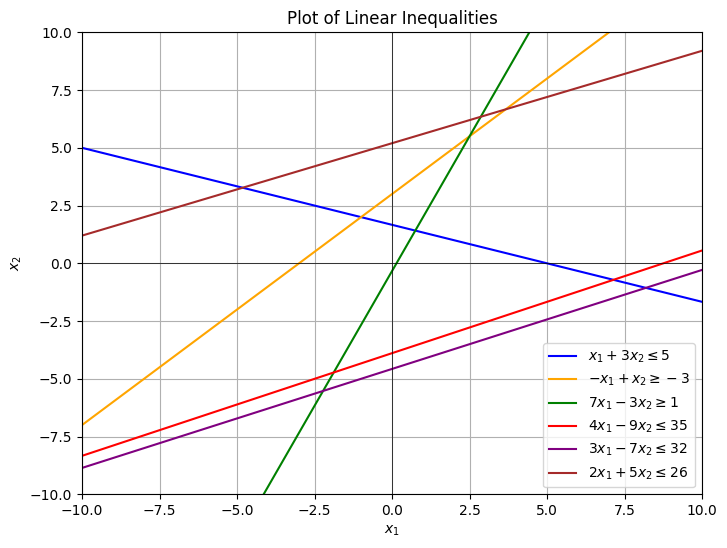

In [94]:
# Create a range of x1 values
x1 = np.linspace(-10, 10, 400)

# Define the equations for x2
x2_1 = (5 - x1) / 3
x2_2 = x1 + 3
x2_3 = (7*x1 - 1) / 3
x2_4 = (4*x1 - 35) / 9
x2_5 = (3*x1 - 32) / 7
x2_6 = (26 + 2*x1) / 5

# Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x1, x2_1, label=r'$x_1 + 3x_2 \leq 5$', color='blue')
plt.plot(x1, x2_2, label=r'$-x_1 + x_2 \geq -3$', color='orange')
plt.plot(x1, x2_3, label=r'$7x_1 - 3x_2 \geq 1$', color='green')
plt.plot(x1, x2_4, label=r'$4x_1 - 9x_2 \leq 35$', color='red')
plt.plot(x1, x2_5, label=r'$3x_1 - 7x_2 \leq 32$', color='purple')
plt.plot(x1, x2_6, label=r'$2x_1 + 5x_2 \leq 26$', color='brown')

# Add labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Plot of Linear Inequalities')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.grid(True)
plt.legend()

# Show plot
plt.show()


#**Part 3**

## Voronoi Diagram

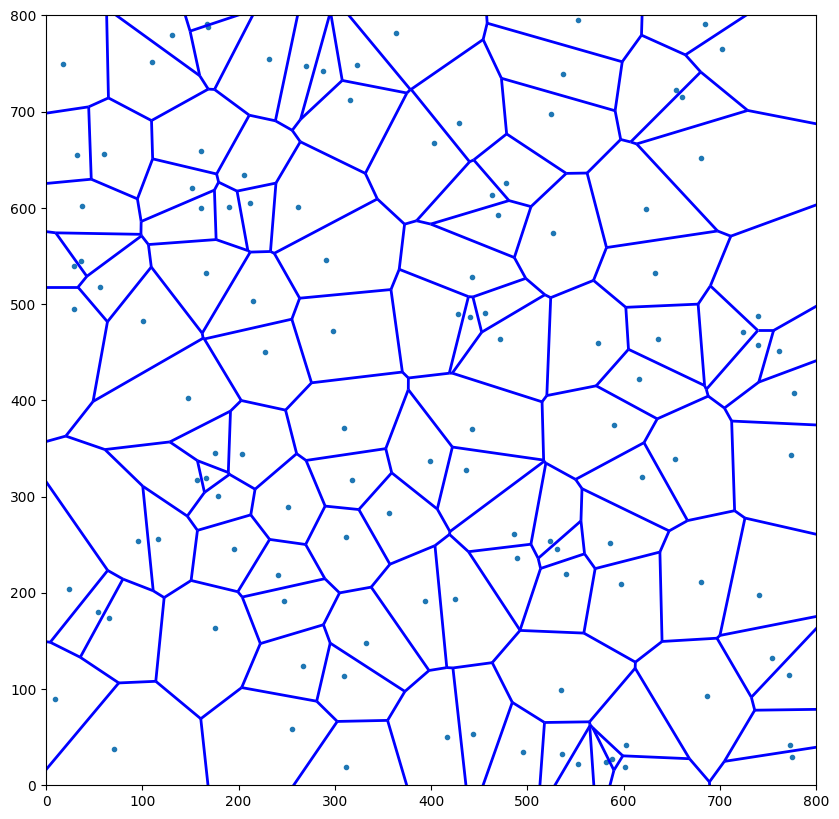

In [59]:

SIZE = 800  # Increase the canvas size
POINTS = 120

# Create a list of random points
random.seed(40)
points = [[random.randrange(SIZE), random.randrange(SIZE)] for i in range(POINTS)]
points.append((-SIZE*3, -SIZE*3))
points.append((-SIZE*3, SIZE*4))
points.append((SIZE*4, -SIZE*3))
points.append((SIZE*4, SIZE*4))

# Compute Voronoi diagram
voronoi = Voronoi(points)

# Plot Voronoi diagram
fig, ax = plt.subplots(figsize=(10, 10))  # Increase the figure size
voronoi_plot_2d(voronoi, ax=ax, show_vertices=False, line_colors='blue', line_width=2)

# Set plot limits and aspect ratio
ax.set_xlim(0, SIZE)
ax.set_ylim(0, SIZE)
ax.set_aspect('equal')

plt.show()

## Delaunay Triangulation

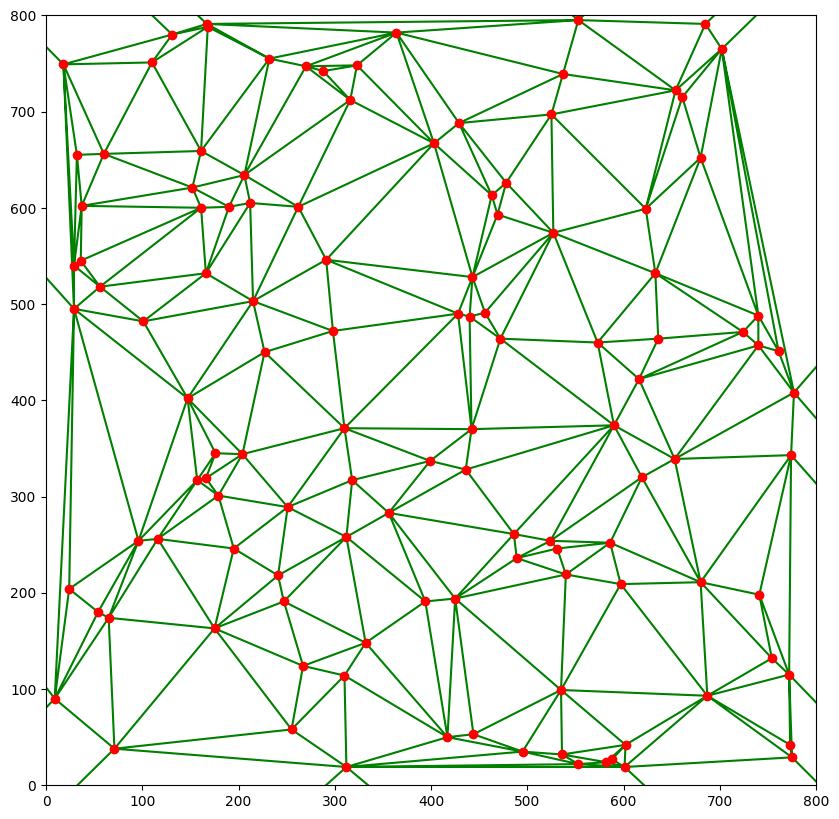

In [60]:
# Create a list of random points
random.seed(40)
points = [[random.randrange(SIZE), random.randrange(SIZE)]
          for i in range(POINTS)]
points.append((-SIZE*3, -SIZE*3))
points.append((-SIZE*3, SIZE*4))
points.append((SIZE*4, -SIZE*3))
points.append((SIZE*4, SIZE*4))

# Compute Delaunay triangulation
delaunay = Delaunay(points)

# Plot Delaunay triangulation
fig, ax = plt.subplots(figsize=(10, 10))
ax.triplot([p[0] for p in points], [p[1] for p in points], delaunay.simplices, color='green')

# Plot the points as well
ax.plot([p[0] for p in points], [p[1] for p in points], 'o', color='red')

# Set plot limits and aspect ratio
ax.set_xlim(0, SIZE)
ax.set_ylim(0, SIZE)
ax.set_aspect('equal')

plt.show()

#**Part 4**

The following part of the code is the implementation of the range tree construction algorithm

- Plotting the tree using the network library




In [61]:
def build_graph_from_tree(node, graph=None, pos=None, level=0, x=0, dx=1.0):
    if graph is None:
        graph = nx.DiGraph()
    if pos is None:
        pos = {}

    if node is not None:
        # Add node to the graph
        graph.add_node(node.point, label=f"({node.point[0]}, {node.point[1]})")

        # Set position for the node
        pos[node.point] = (x, -level)

        # Calculate the new x position for the children
        dx /= 2
        next_x = x - dx

        if node.left is not None:
            graph.add_edge(node.point, node.left.point)
            build_graph_from_tree(node.left, graph, pos, level + 1, next_x, dx)
            next_x += dx * 2  # Move to the next x position for the right child

        if node.right is not None:
            graph.add_edge(node.point, node.right.point)
            build_graph_from_tree(node.right, graph, pos, level + 1, next_x, dx)

    return graph, pos

def draw_tree(node):
    graph, pos = build_graph_from_tree(node)

    # Draw the tree using networkx and matplotlib
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels=nx.get_node_attributes(graph, 'label'), node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("2D Range Tree Visualization")
    plt.show()





- Creating a class to represnt each entity of the tree.




The range x-tree 


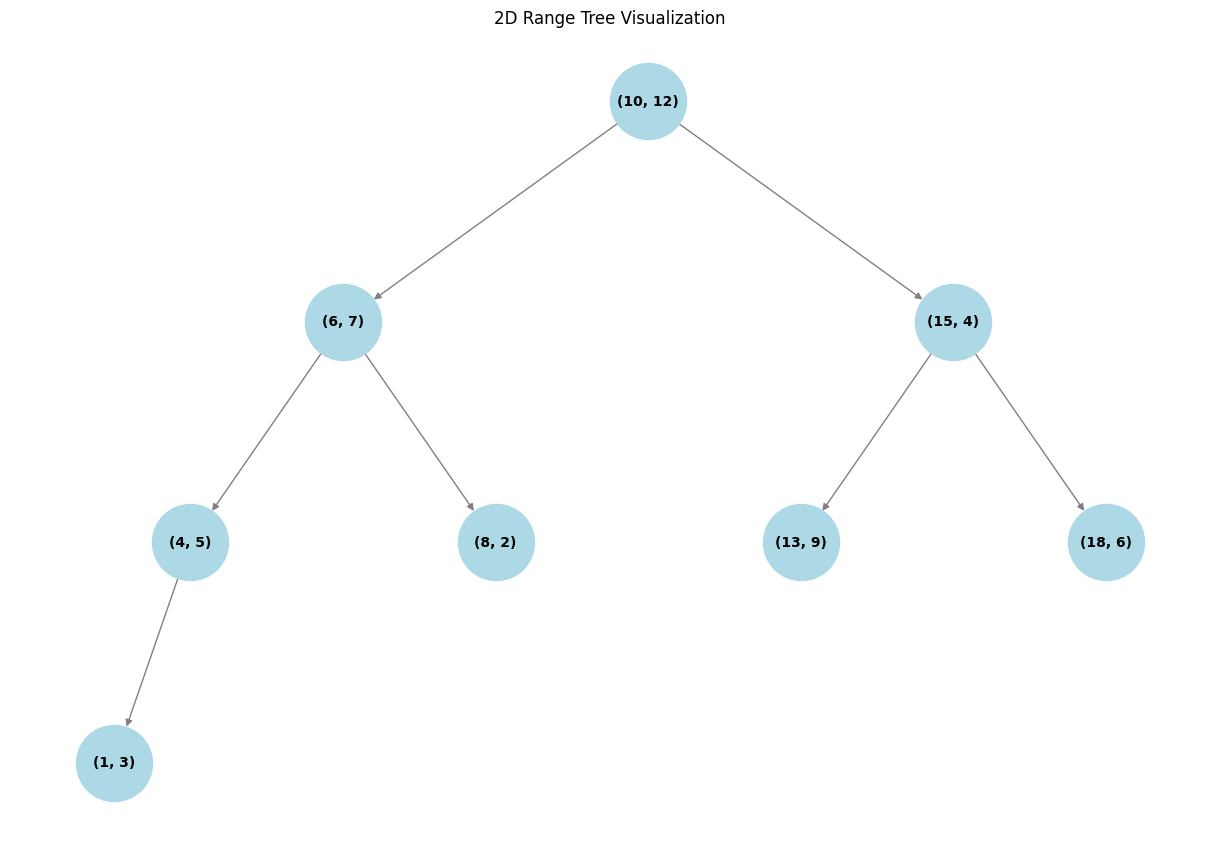

In [78]:
class RangeTree2D:
    def __init__(self, points):
        self.points = points
        self.root = self.build_primary_tree(points)
        self.build_secondary_trees(self.root, points)

    class Node:
        def __init__(self, point, left=None, right=None, secondary_tree=None):
            self.point = point  # (x, y)
            self.left = left    # Left child in the primary tree
            self.right = right  # Right child in the primary tree
            self.secondary_tree = secondary_tree  # Secondary tree (BST on y-coordinates)

    def build_primary_tree(self, points):
        if not points:
            return None
        points.sort(key=lambda p: p[0])
        median_index = len(points) // 2
        median_point = points[median_index]

        left_subtree = self.build_primary_tree(points[:median_index])
        right_subtree = self.build_primary_tree(points[median_index + 1:])
        ## Uncomment the following two lines in order to print each stage of the construction of the x-tree
        # print("Next Step")
        # draw_tree(self.Node(median_point, left_subtree, right_subtree))
        return self.Node(median_point, left_subtree, right_subtree)

    def build_secondary_tree(self, points):
        if not points:
            return None
        points.sort(key=lambda p: p[1])
        median_index = len(points) // 2
        median_point = points[median_index]
        left_subtree = self.build_secondary_tree(points[:median_index])
        right_subtree = self.build_secondary_tree(points[median_index + 1:])
        return self.Node(median_point, left_subtree, right_subtree)

    def build_secondary_trees(self, node, all_points):
        if node is None:
            return
        subtree_points = self.collect_subtree_points(node, all_points)
        node.secondary_tree = self.build_secondary_tree(subtree_points)
        self.build_secondary_trees(node.left, all_points)
        self.build_secondary_trees(node.right, all_points)

    def collect_subtree_points(self, node, all_points):
        if node is None:
            return []
        return [point for point in all_points if self.is_point_in_subtree(node, point)]

    def is_point_in_subtree(self, node, point):
        if node is None:
            return False
        x, y = point
        node_x, node_y = node.point
        if x < node_x:
            return self.is_point_in_subtree(node.left, point)
        elif x > node_x:
            return self.is_point_in_subtree(node.right, point)
        else:
            return True


    def range_search(self, node, xmin, xmax, ymin, ymax):
        if node is None:
            return []

        # Use a set to avoid duplicates
        points_in_range = set()

        # Check if the current node's point is in the x-range
        x, y = node.point
        if xmin <= x <= xmax:
            # Perform y-range search on the secondary tree and update the set
            points_in_range.update(self.secondary_range_search(node.secondary_tree, xmin, xmax, ymin, ymax))


        # Recursively search the left and right subtrees
        # If there might be points in the left subtree
        if xmin <= x:
            points_in_range.update(self.range_search(node.left, xmin, xmax, ymin, ymax))

        # If there might be points in the right subtree
        if x <= xmax:
            points_in_range.update(self.range_search(node.right, xmin, xmax, ymin, ymax))

        return list(points_in_range)


    def secondary_range_search(self, node, xmin, xmax, ymin, ymax):
        if node is None:
            return set()

        # Use a set to collect valid points in the y-range
        points_in_y_range = set()

        # Current point in the secondary tree (x, y)
        x, y = node.point

        # Check if the x-coordinate of the current point is within the x-range
        if xmin <= x <= xmax:
            # If the y-coordinate is within the y-range, include it
            if ymin <= y <= ymax:
                points_in_y_range.add(node.point)

        # Recursively check the left subtree (y must be >= ymin)
        if ymin <= y:
            points_in_y_range.update(self.secondary_range_search(node.left, xmin, xmax, ymin, ymax))

        # Recursively check the right subtree (y must be <= ymax)
        if y <= ymax:
            points_in_y_range.update(self.secondary_range_search(node.right, xmin, xmax, ymin, ymax))

        return points_in_y_range



# Example: Building and visualizing a 2D Range Tree
points = [(1, 3), (4, 5), (6, 7), (8, 2), (10, 12), (13, 9), (15, 4), (18, 6)]

# Build and visualize the tree
range_tree = RangeTree2D(points)
print("The range x-tree ")
draw_tree(range_tree.root)
# Moreover each step of the construction will be printed






-  Printing the sencondary trees of each node of the x-range tree

-> The secondary range trees.


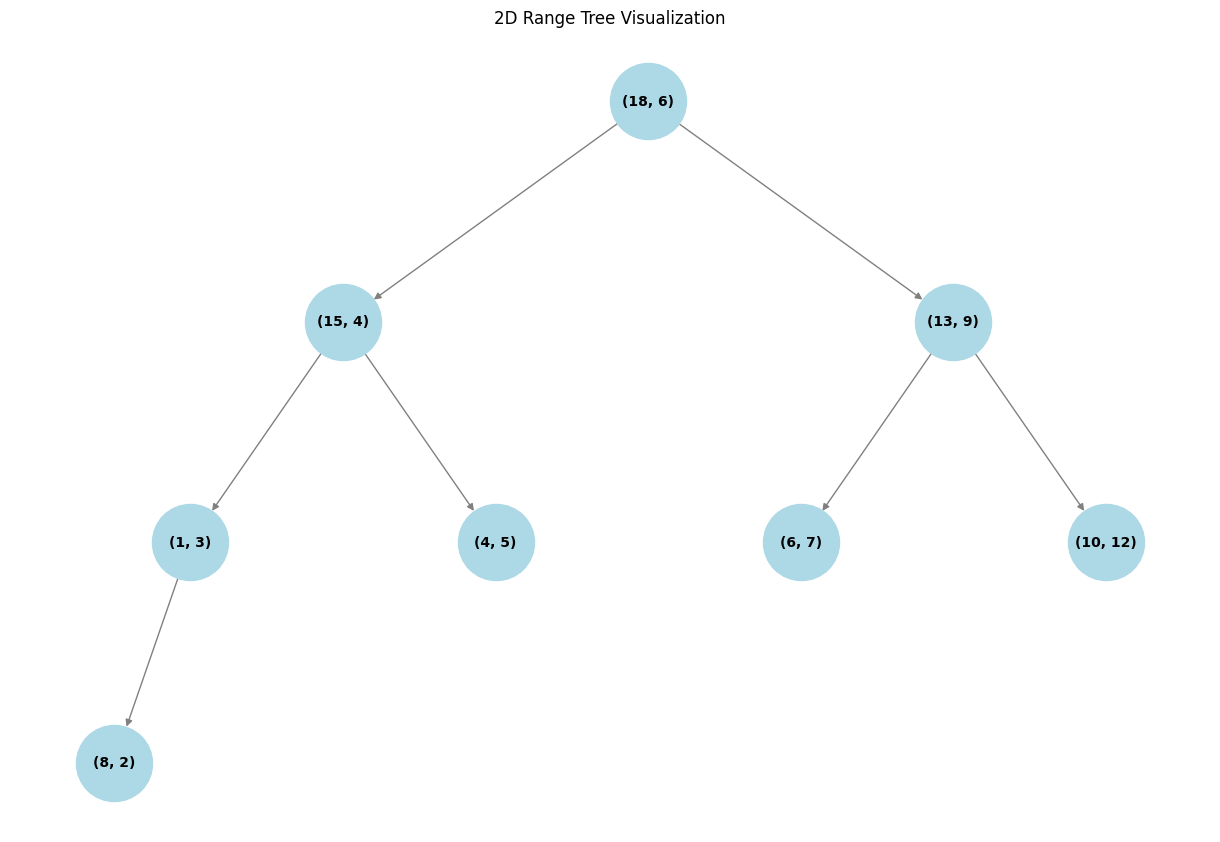

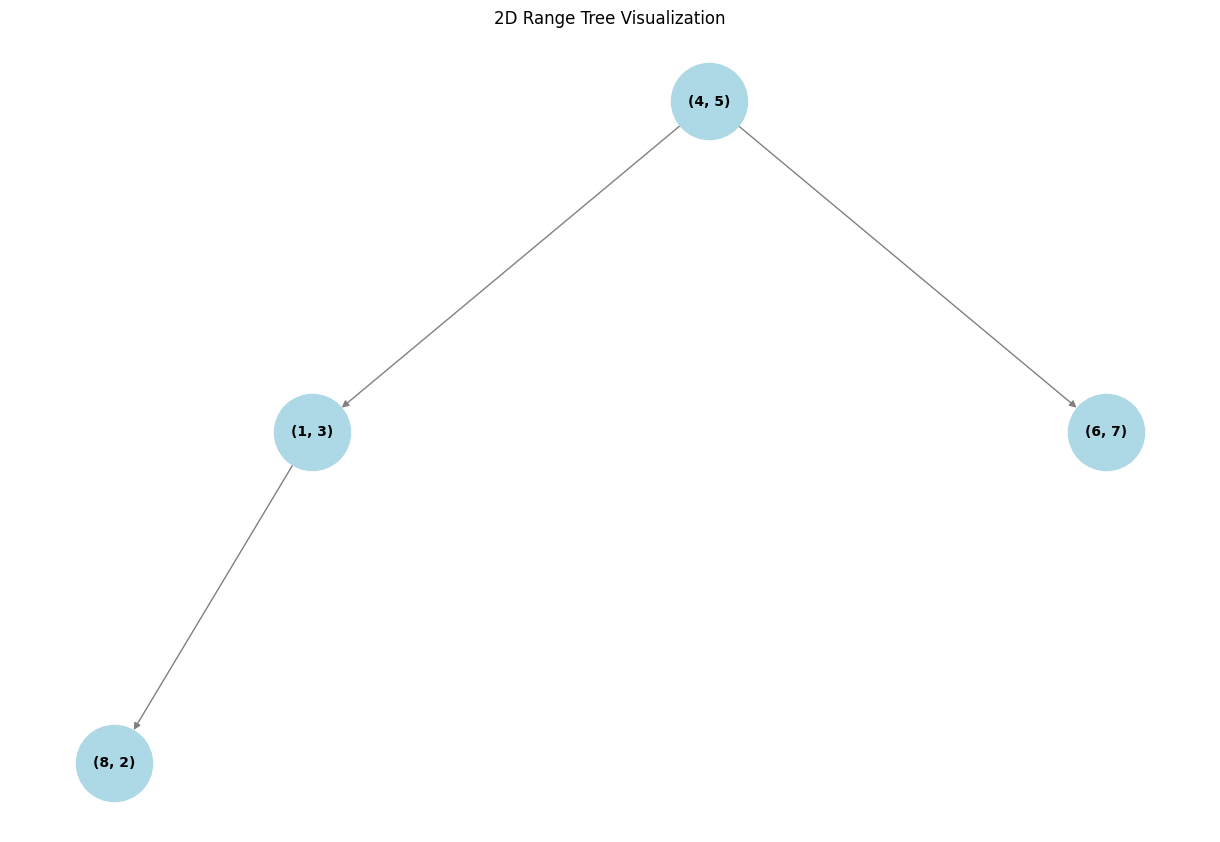

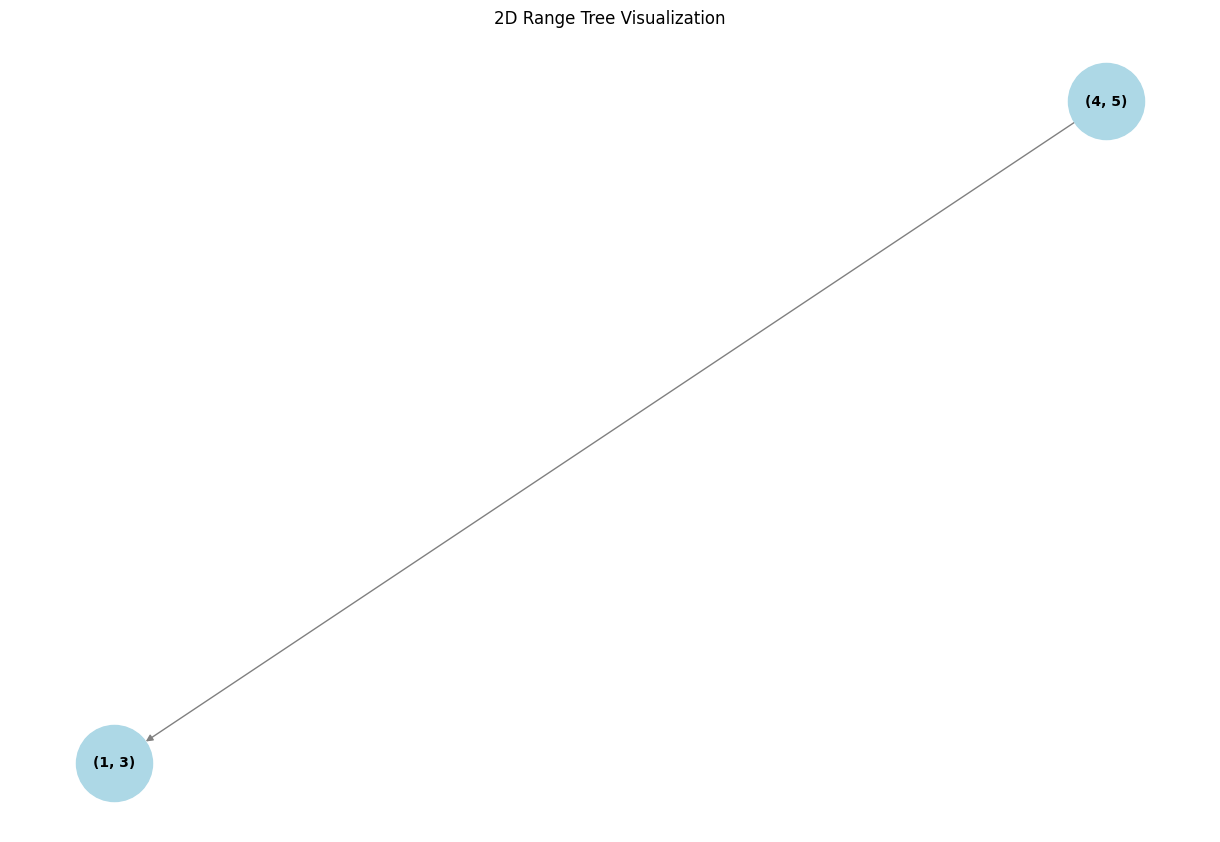

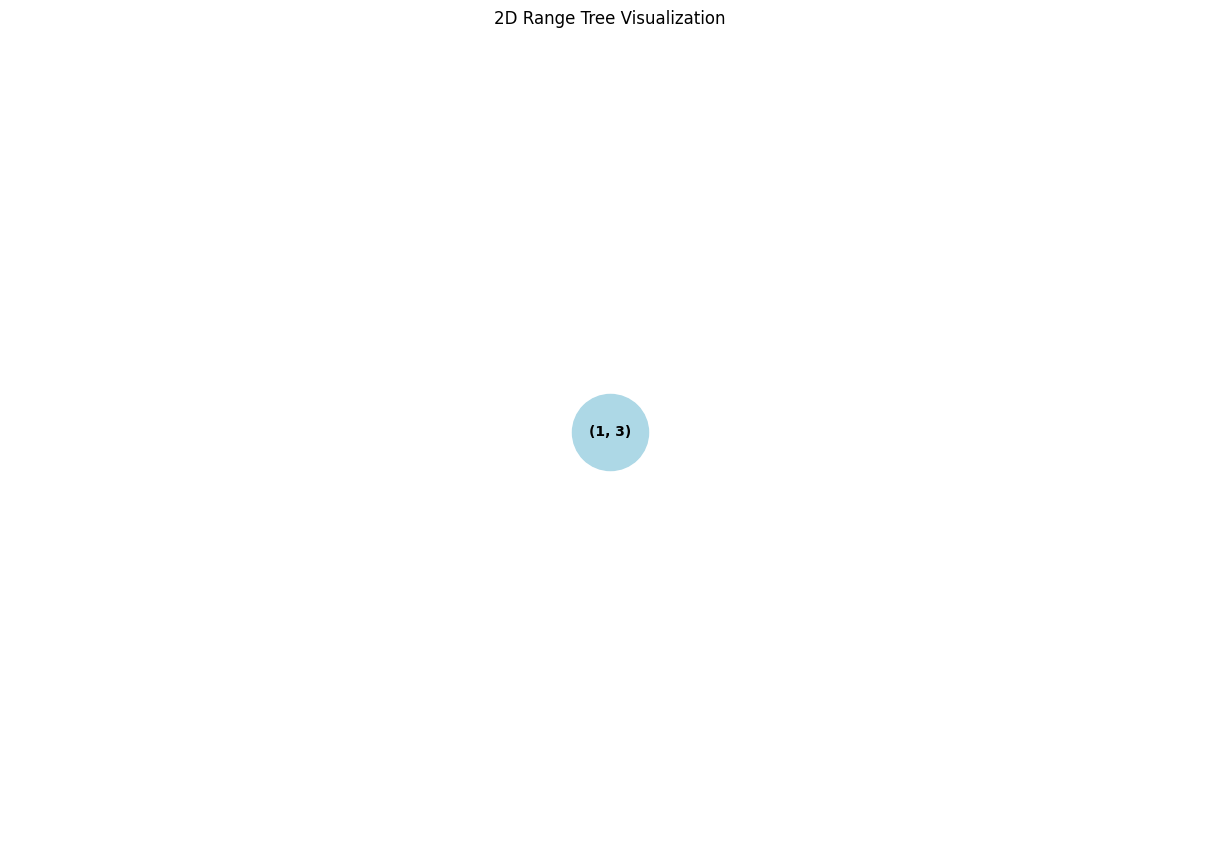

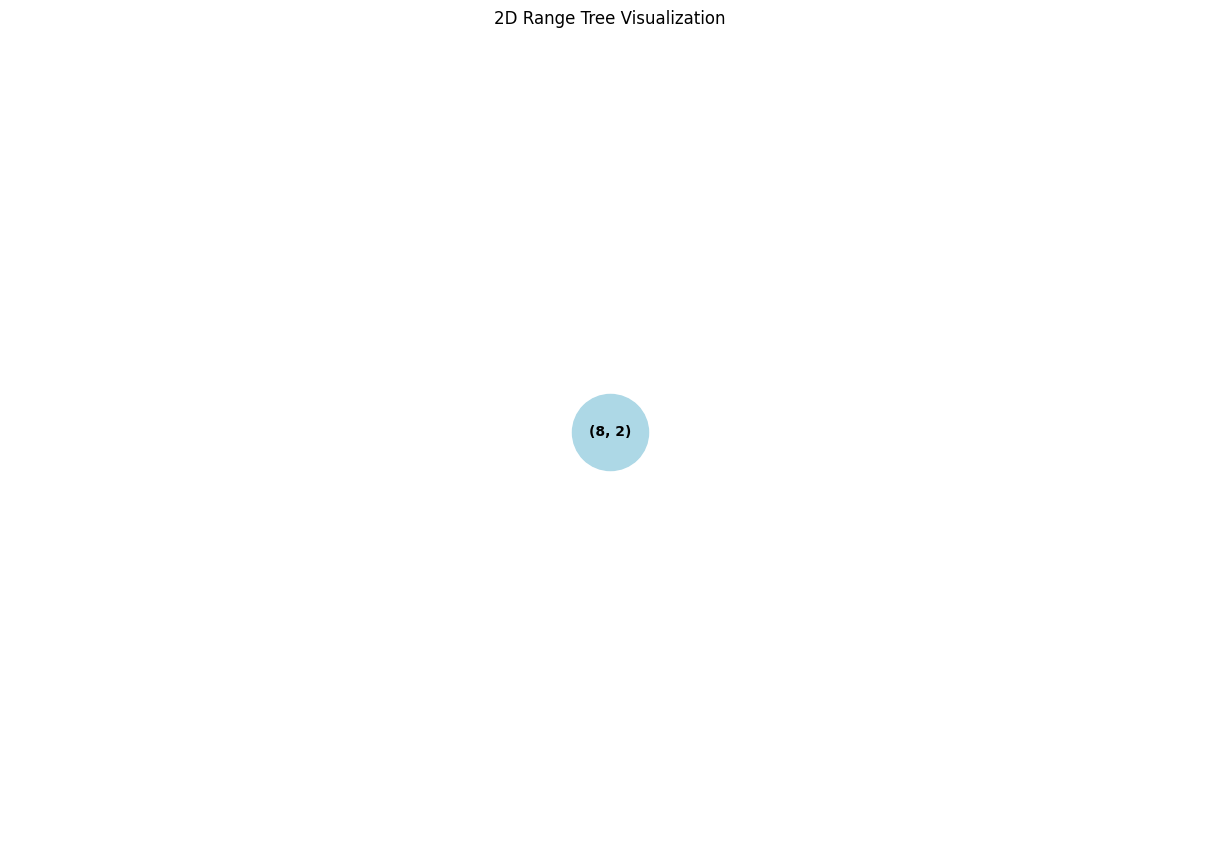

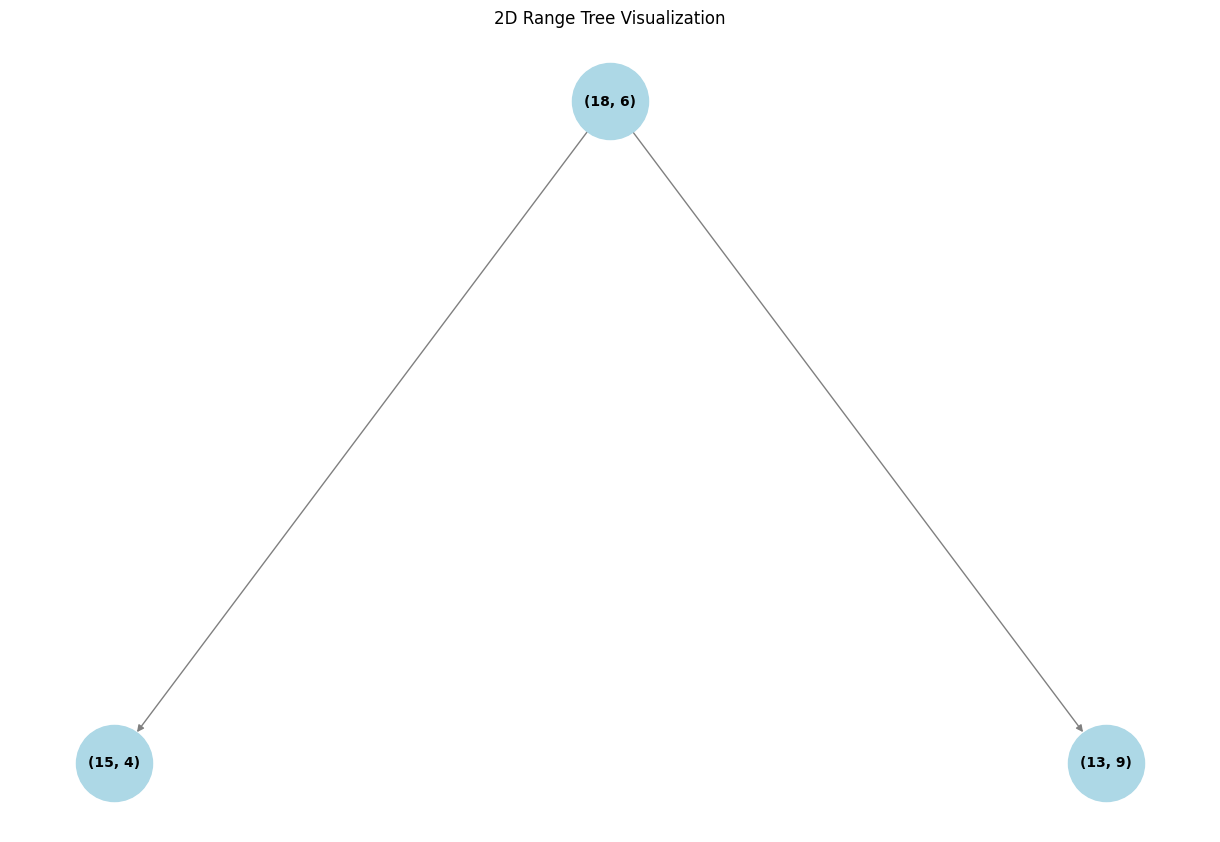

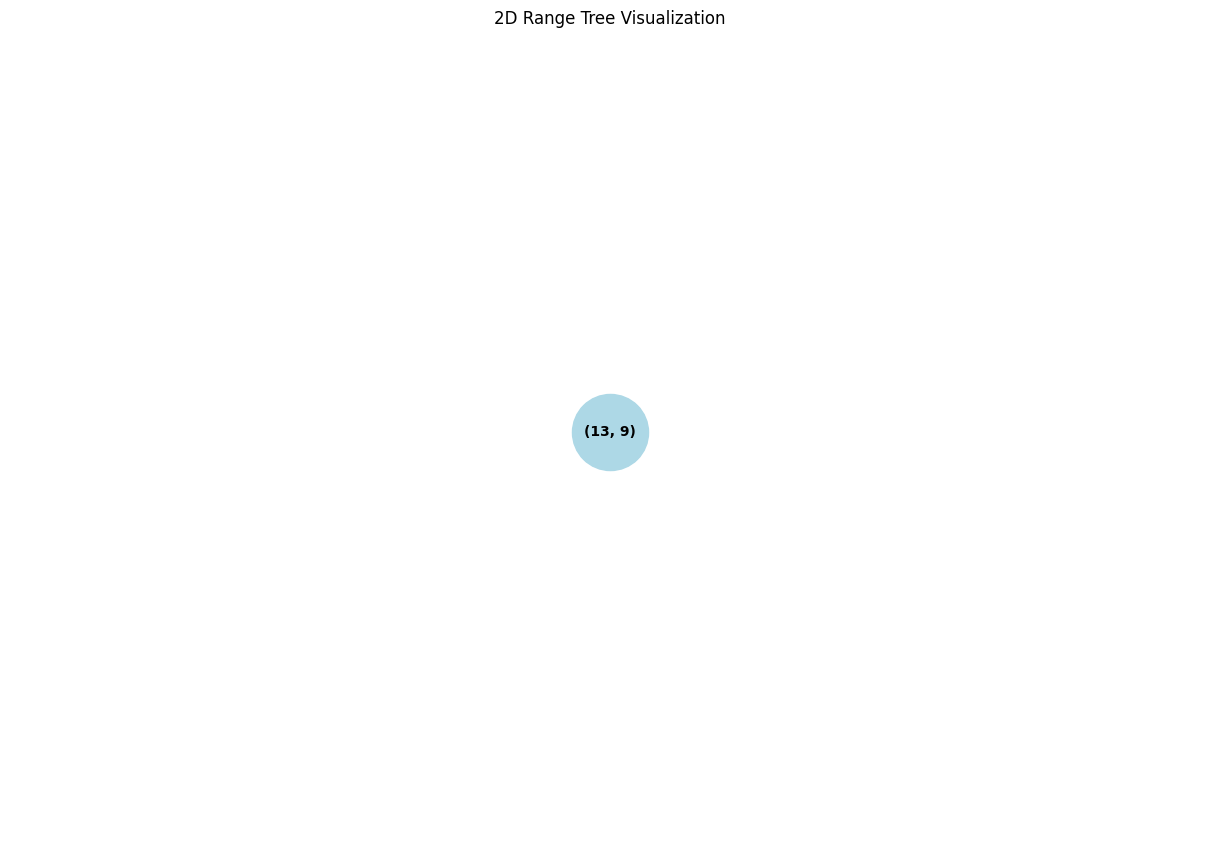

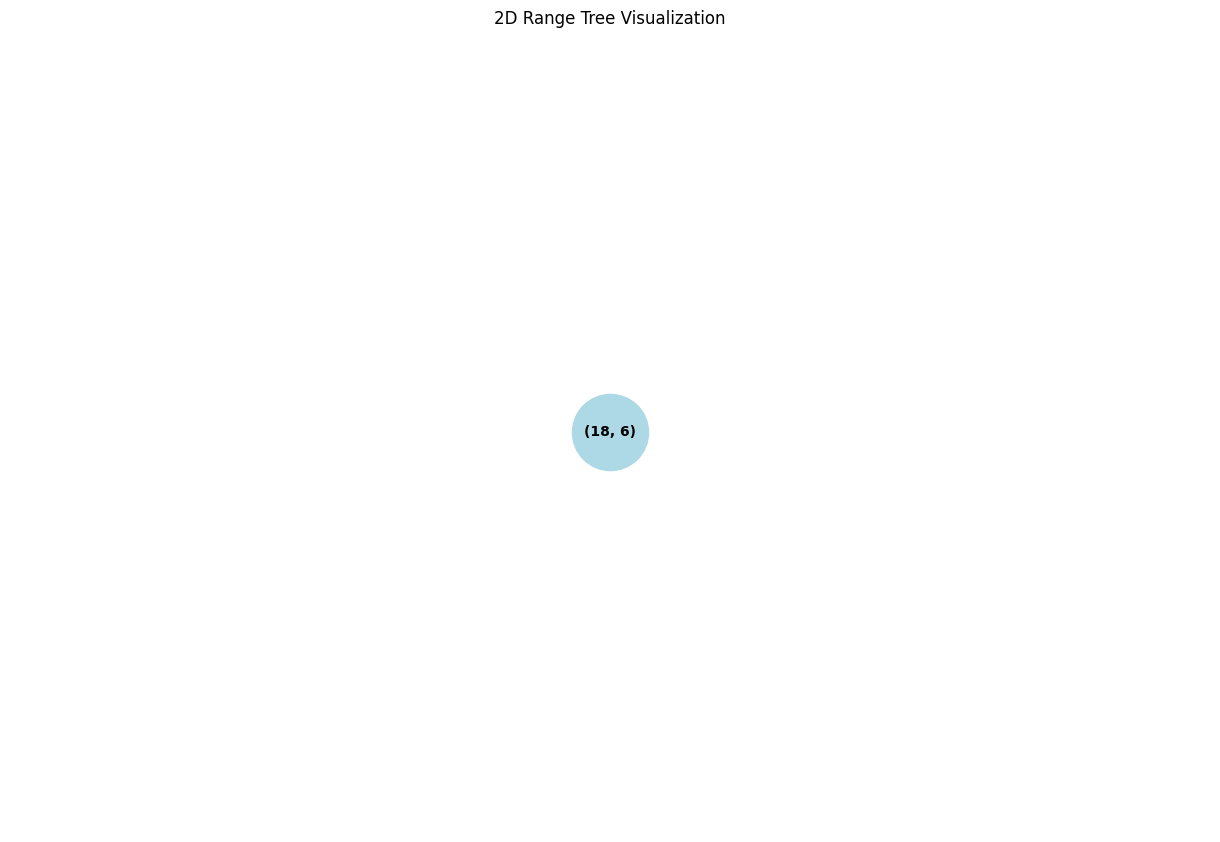

In [ ]:
print("-> The secondary range trees.")
draw_tree(range_tree.root.secondary_tree)
def visualizer(node):

  if node.left is not None:
    draw_tree(node.left.secondary_tree)
    visualizer(node.left)
  if node.right is not None:
    draw_tree(node.right.secondary_tree)
    visualizer(node.right)

visualizer(range_tree.root)

- Using the range_search function to test the range of the nodes that the function will return like for certain restriction xmin, xmax, ymin, ymax

In [ ]:
print("Range search problem")
points_in_range = range_tree.range_search(range_tree.root, xmin=4, xmax=15, ymin=3, ymax=9)
print(points_in_range)

Range search problem
[(15, 4), (6, 7), (4, 5), (13, 9)]


In [81]:
def generate_unique_integer_points(num_points, x_range, y_range):
    points = set()
    while len(points) < num_points:
        x = random.randint(*x_range)
        y = random.randint(*y_range)
        points.add((x, y))
    return list(points)

# Parameters
num_points = 120
x_range = (0, 100)  # Example range for x-coordinates
y_range = (0, 100)  # Example range for y-coordinates

# Generate unique points
unique_points = generate_unique_integer_points(num_points, x_range, y_range)
print(unique_points[:10])

[(81, 76), (35, 42), (88, 45), (29, 41), (32, 12), (77, 99), (21, 46), (15, 60), (96, 24), (49, 71)]


In [82]:
range_tree = RangeTree2D(unique_points)
points_in_range = range_tree.range_search(range_tree.root, xmin=8, xmax=19, ymin=2, ymax=22)
print(points_in_range)
# draw_tree(range_tree.root)


[(15, 10), (19, 15), (18, 15)]


- Visualizing the the search problem, the list of the points that the function returns are captured in the red rectangle

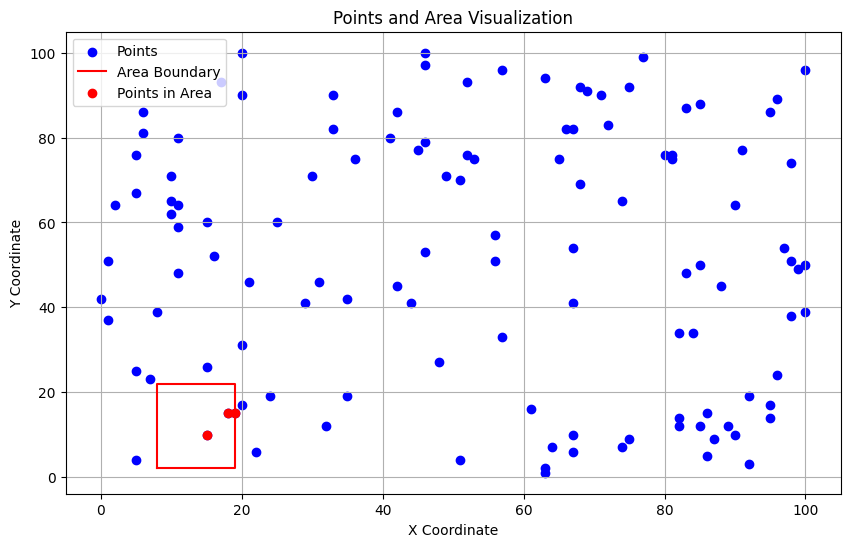

Points within the red area:
(15, 10)
(18, 15)
(19, 15)


In [83]:

def plot_points_with_area(points, area_points):
    # Unzip all points into x and y coordinates
    x_coords, y_coords = zip(*points)

    # Unzip the area points into x and y coordinates
    area_x_coords, area_y_coords = zip(*area_points)

    # Calculate the bounding box of the square
    min_x = min(area_x_coords)
    max_x = max(area_x_coords)
    min_y = min(area_y_coords)
    max_y = max(area_y_coords)

    # Filter points that fall within the area
    points_in_area = [point for point in points if min_x <= point[0] <= max_x and min_y <= point[1] <= max_y]

    # Plot all points
    plt.figure(figsize=(10, 6))
    plt.scatter(x_coords, y_coords, c='blue', marker='o', label='Points')

    # Plot the boundary of the area with a red border
    plt.plot([min_x, max_x, max_x, min_x, min_x],
             [min_y, min_y, max_y, max_y, min_y],
             c='red', label='Area Boundary')

    # Highlight points within the area
    if points_in_area:
        area_x_coords, area_y_coords = zip(*points_in_area)
        plt.scatter(area_x_coords, area_y_coords, c='red', marker='o', label='Points in Area')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Points and Area Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print points that belong to the red area
    print("Points within the red area:")
    for point in points_in_area:
        print(point)


# Example list of 4 points that define the area (the corners of the square)
area_points = [(8, 22), (19, 2)]

# Plot points and highlight the area
plot_points_with_area(unique_points, area_points)
